1.   [Scikit-learn/sklearn](https://scikit-learn.org/stable/)
2.   [Tensorflow](https://www.tensorflow.org/?hl=es)
3.   [Keras](https://keras.io/)
4.   [Pytorch](https://pytorch.org/)
5.   [Nltk](https://www.nltk.org/)
6.   [Spacy](https://spacy.io/)

Puede encontrar mas informacion y librerias utiles en [este blog](https://www.iartificial.net/librerias-de-python-para-machine-learning/#TensorFlow)

#Clasificador simple

Un clasificador de imagenes es un tipo de red neuronal que es capaz de asignar una serie de numeros (pixeles) a una clase, en este caso se usa el ejemplo hecho por tensorflow de un [Clasificador de imagenes](https://www.tensorflow.org/tutorials/keras/classification?hl=es) para un dataset de ropa.

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

**Data set de ropa**

In [ ]:
dataset = keras.datasets.fashion_mnist
(Xe, Ye), (Xt, Yt) = dataset.load_data()
clases = ['Camiseta/top', 'Pantalon', 'Sueter', 'Vestido', 'Saco',
               'Sandalia', 'Camisa', 'Zapatilla', 'Bolsa/maleta', 'Bota tobillera']

4431872/4422102 [==============================] - 0s 0us/step


**Data set de numeros**

In [ ]:
dataset = keras.datasets.mnist
(Xe, Ye), (Xt, Yt) = dataset.load_data()
clases = [str(i) for i in range(10)]

11501568/11490434 [==============================] - 0s 0us/step


---

In [ ]:
Xe = Xe / 255.0
Xt = Xt / 255.0

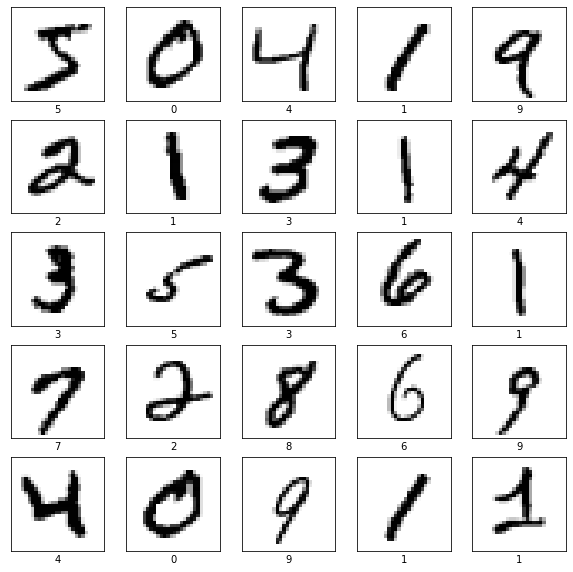

In [ ]:
#@title Mostrar primeros 25 datos { vertical-output: true }
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Xe[i], cmap=plt.cm.binary)
    plt.xlabel(clases[Ye[i]])
plt.show()

In [ ]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
modelo.compile(optimizer='sgd',#lbfgs, adam, sgd
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
modelo.fit(Xe,Ye, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6360 - acc: 0.8408
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3336 - acc: 0.9069
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2844 - acc: 0.9203
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2535 - acc: 0.9283
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2301 - acc: 0.9348
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2119 - acc: 0.9400
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1968 - acc: 0.9445
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1840 - acc: 0.9481
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1727 - acc: 0.9514
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1629 - acc: 0.9543


In [ ]:
prediccion=modelo.predict(Xt)
clases[np.argmax(prediccion[10])]

'0'

In [ ]:
def plot_image(i, predictions_array, true_label, img,class_names):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

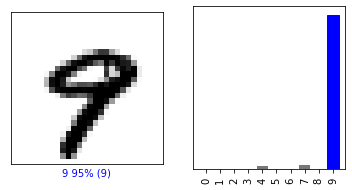

In [ ]:
#@title Clasificar imagen { run: "auto", vertical-output: true }
Numero_de_imagen = 9 #@param {type:"slider", min:0, max:100, step:1}

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(Numero_de_imagen, prediccion[Numero_de_imagen], Yt, Xt,clases)
plt.subplot(1,2,2)
plt.xticks([Numero_de_imagen for Numero_de_imagen in range(len(clases)+1)],clases,rotation=90)
plot_value_array(Numero_de_imagen, prediccion[Numero_de_imagen],  Yt)
plt.show()

#Filtro convolucional
los filtros convolucionales pueden aplicarse a todo tipo de datos pero principalmente a imagenes, ya que se utiliza una matriz para generar la transformacion.

**incluir imagen manuelmente**

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
img=Image.open("IMG_20190404_132145.jpg")#imagen original
plt.axis("off")
plt.imshow(img)

228827136/228813984 [==============================] - 2s 0us/step


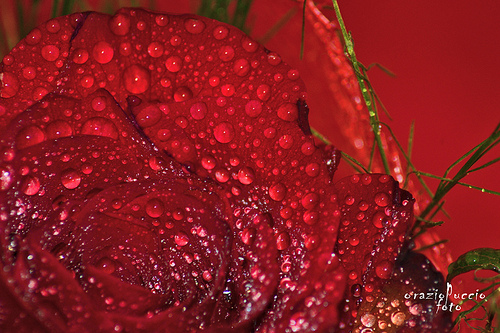

In [ ]:
import pathlib
from PIL import Image
import PIL
import matplotlib.pyplot as plt
import numpy as np
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)
#@title Usar imagen de un dataset { run: "auto", vertical-output: true }
numero_de_imagen = 43 #@param {type:"slider", min:0, max:100, step:1}
tipo = "Rosa" #@param ["Diente de leon","Rosa","Tulipan","Margarita","Girasol"]
sets={
    "Diente de leon":list(data_dir.glob('dandelion/*')),
    "Rosa":list(data_dir.glob('roses/*')),
    "Tulipan":list(data_dir.glob('tulips/*')),
    "Margarita":list(data_dir.glob('daisy/*')),
    "Girasol":list(data_dir.glob('sunflowers/*'))
}
img=PIL.Image.open(str(sets.get(tipo)[numero_de_imagen]))
img

Text(0.5, 1.0, 'B')

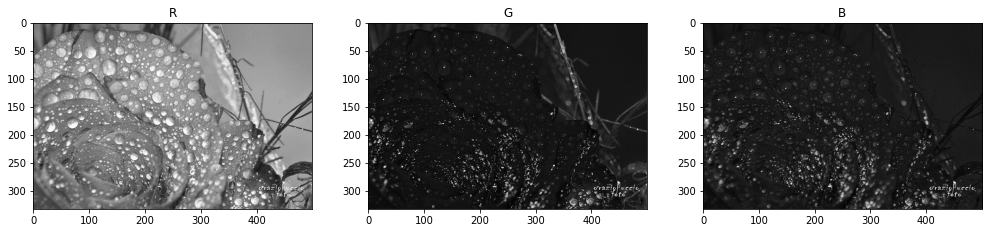

In [ ]:
#@title Ver canales RBG { run: "auto", vertical-output: true }
cmap = "gray" #@param ["gray", "viridis", "hot"] {allow-input: true}

plt.figure(figsize=(17,7))
plt.subplot(1,3,1)
plt.imshow(img.getchannel("R"), cmap=cmap)
plt.title("R")
plt.subplot(1,3,2)
plt.imshow(img.getchannel("G"), cmap=cmap)
plt.title("G")
plt.subplot(1,3,3)
plt.imshow(img.getchannel("B"), cmap=cmap)
plt.title("B")

**Filtro**

Un filtro no es mas que una matriz $n\times n$ que se va a pasar por encima de la imagen como si fuera un barrido de forma que se multiplica cada pixel por el valor de la matriz correspondiente y luego se suma, dando como resultado una disminucion de resolucion y la generacion de un efecto sobre la imagen

In [ ]:
filtro=np.array([[-1,0,1],
                 [-1,0,1],
                 [-1,0,1]])

**Aplicacion del filtro**

In [ ]:
im=[[0 for i in range(img.size[0]-2)] for j in range(img.size[1]-2)]
pixeles=np.squeeze(img)
for i in range(img.size[1]-2):
  for j in range(img.size[0]-2):
    im[i][j]=sum(sum((pixeles[i:i+3,j:j+3]*filtro.T)))
im=np.squeeze(im)

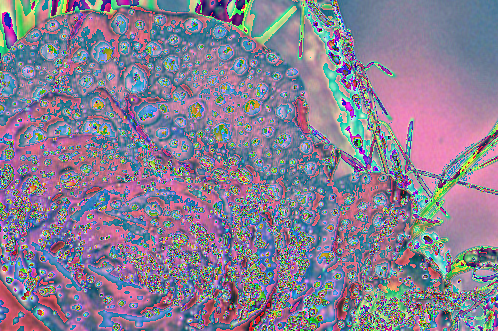

In [ ]:
im=Image.fromarray(im.astype(np.uint8))
im

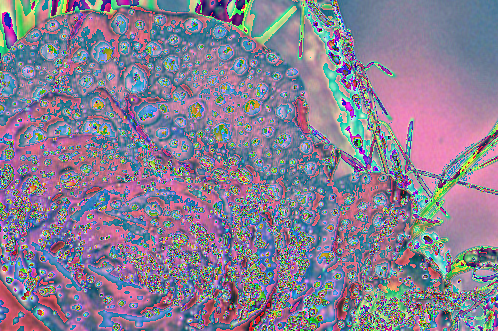

In [ ]:
ReLu=lambda x: np.maximum(0,x)
im=Image.fromarray(ReLu(np.squeeze(im)).astype(np.uint8))
im

Text(0.5, 1.0, 'B')

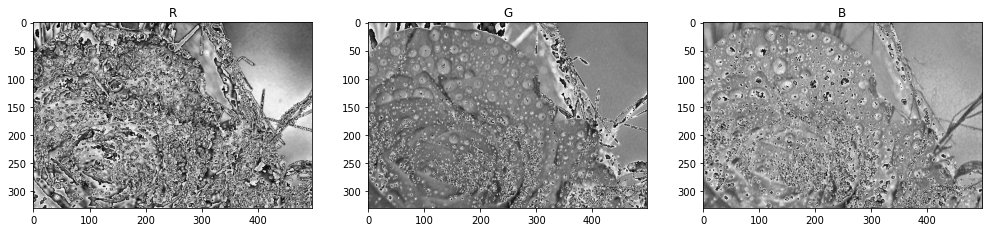

In [ ]:
#@title Ver canales RGB { run: "auto", vertical-output: true }
cmap = "gray" #@param ["gray", "viridis", "hot"] {allow-input: true}

plt.figure(figsize=(17,7))
plt.subplot(1,3,1)
plt.imshow(im.getchannel("R"), cmap=cmap)
plt.title("R")
plt.subplot(1,3,2)
plt.imshow(im.getchannel("G"), cmap=cmap)
plt.title("G")
plt.subplot(1,3,3)
plt.imshow(im.getchannel("B"), cmap=cmap)
plt.title("B")

#Clasificador con redes neuronales convolucionales
Una red neuronal convolucional es una red neuronal que aplica filtros de convolucion para obtener las caracteristicas mas importantes de los datos recibidos, en este caso para clasificar flores en este caso se toma el [ejemplo](https://www.tensorflow.org/tutorials/images/classification?hl=es) de tensorflow.

[(Leer mas sobre redes neuronales convolucionales)](https://www.juanbarrios.com/redes-neurales-convolucionales/#:~:text=Y%20la%20funci%C3%B3n%20de%20Softmax,sea%20gato%2C%20segun%20este%20ejemplo.)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228813984/228813984 [==============================] - 2s 0us/step


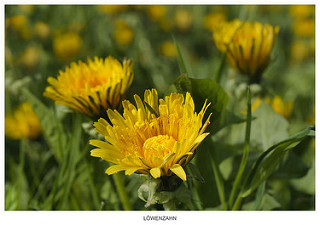

In [ ]:
#@title Visualizacion de imagenes del dataset { run: "auto", vertical-output: true }
numero_de_imagen = 47 #@param {type:"slider", min:0, max:100, step:1}
tipo = "Diente de leon" #@param ["Diente de leon","Rosa","Tulipan","Margarita","Girasol"]
sets={
    "Diente de leon":list(data_dir.glob('dandelion/*')),
    "Rosa":list(data_dir.glob('roses/*')),
    "Tulipan":list(data_dir.glob('tulips/*')),
    "Margarita":list(data_dir.glob('daisy/*')),
    "Girasol":list(data_dir.glob('sunflowers/*'))
}
PIL.Image.open(str(sets.get(tipo)[numero_de_imagen]))

In [3]:
batch_size = 32
alto = 180
ancho = 180

In [4]:
X = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(alto, ancho),
  batch_size=batch_size)

Xt = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(alto, ancho),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [6]:
clases = X.class_names
print(clases)
n_clases = len(clases)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(alto, ancho, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),#La capa de maxpooling reduce el tamaño de la imagen tomando el valor mas grande de una submatriz
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(n_clases)
])

model.compile(optimizer='adam',#D. gradiente
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [7]:
epochs=15
model.fit(
  X,
  validation_data=Xt,
  epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 19s 77ms/step - loss: 1.4013 - accuracy: 0.4203 - val_loss: 1.0887 - val_accuracy: 0.5790
Epoch 2/15
92/92 [==============================] - 8s 78ms/step - loss: 0.9896 - accuracy: 0.6144 - val_loss: 0.9554 - val_accuracy: 0.6281
Epoch 3/15
92/92 [==============================] - 7s 72ms/step - loss: 0.8380 - accuracy: 0.6877 - val_loss: 0.9829 - val_accuracy: 0.6063
Epoch 4/15
92/92 [==============================] - 12s 107ms/step - loss: 0.6723 - accuracy: 0.7486 - val_loss: 0.9085 - val_accuracy: 0.6540
Epoch 5/15
92/92 [==============================] - 7s 78ms/step - loss: 0.4641 - accuracy: 0.8348 - val_loss: 0.9771 - val_accuracy: 0.6649
Epoch 6/15
92/92 [==============================] - 8s 80ms/step - loss: 0.2893 - accuracy: 0.9019 - val_loss: 1.2358 - val_accuracy: 0.6390
Epoch 7/15
92/92 [==============================] - 6s 65ms/step - loss: 0.1856 - accuracy: 0.9428 - val_loss: 1.4931 - val_accuracy: 0.5940
Epoch 8/15

1/1 [==============================] - 0s 18ms/step
Esta imagen es parecida a un roses con un 99.99% de certeza.


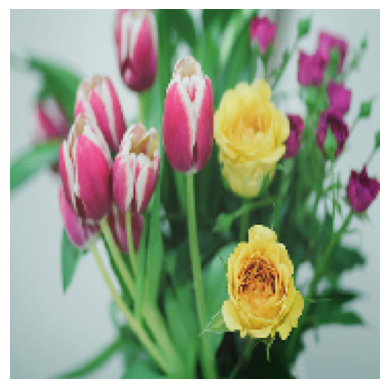

In [9]:
#@title Prediccion { run: "auto", vertical-output: true }
numero_de_imagen = 73 #@param {type:"slider", min:0, max:100, step:1}
tipo = "Rosa" #@param ["Diente de leon","Rosa","Tulipan","Margarita","Girasol"]
sets={
    "Diente de leon":list(data_dir.glob('dandelion/*')),
    "Rosa":list(data_dir.glob('roses/*')),
    "Tulipan":list(data_dir.glob('tulips/*')),
    "Margarita":list(data_dir.glob('daisy/*')),
    "Girasol":list(data_dir.glob('sunflowers/*'))
}
img = keras.preprocessing.image.load_img(
    str(sets.get(tipo)[numero_de_imagen]), target_size=(alto, ancho)
)

img_arr = keras.preprocessing.image.img_to_array(img)
img_arr = tf.expand_dims(img_arr, 0)

prediccion = model.predict(img_arr)
score = tf.nn.softmax(prediccion[0])

print(
    "Esta imagen es parecida a un {} con un {:.2f}% de certeza."
    .format(clases[np.argmax(score)], 100 * np.max(score))
)

plt.axis("off")
plt.imshow(img)